In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# https://www.kaggle.com/nobelfoundation/nobel-laureates
nobel_data = pd.read_csv('Math_prac/nobel_prize_winners.csv')

In [ ]:
nobel_data.sort_values(['Year', 'Category'], inplace=True)
nobel_data.head(10)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1-Jan,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,3/1/1911,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1-Jan,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,9/7/1907,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1-Jan,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,3/31/1917,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,2-Jan,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,10/30/1910,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,2-Jan,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,6/12/1912,Paris,France
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1-Jan,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,2/10/1923,Munich,Germany
6,1902,Chemistry,The Nobel Prize in Chemistry 1902,"""in recognition of the extraordinary services ...",1-Jan,161,Individual,Hermann Emil Fischer,1852-10-09,Euskirchen,Prussia (Germany),Male,Berlin University,Berlin,Germany,7/15/1919,Berlin,Germany
7,1902,Literature,The Nobel Prize in Literature 1902,"""the greatest living master of the art of hist...",1-Jan,571,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Schleswig (Germany),Male,NaN,NaN,NaN,11/1/1903,Charlottenburg,Germany
8,1902,Medicine,The Nobel Prize in Physiology or Medicine 1902,"""for his work on malaria, by which he has show...",1-Jan,294,Individual,Ronald Ross,1857-05-13,Almora,India,Male,University College,Liverpool,United Kingdom,9/16/1932,Putney Heath,United Kingdom
9,1902,Peace,The Nobel Peace Prize 1902,NaN,2-Jan,464,Individual,Élie Ducommun,1833-02-19,Geneva,Switzerland,Male,NaN,NaN,NaN,12/7/1906,Bern,Switzerland


## Далее, хочется исследовать возраст победителей, поэтому убираю награды организациям

In [ ]:
nobel_data_ind = nobel_data[(nobel_data['Laureate Type'] == 'Individual')&(nobel_data['Birth Date'].isnull() == False)].copy()

In [ ]:
date_t_1 = nobel_data_ind['Birth Date'].str.contains("/", na=False)
nobel_data_ind1 = nobel_data_ind[date_t_1].copy()

date_t_2 = ~nobel_data_ind['Birth Date'].str.contains("/", na=False)
nobel_data_ind2 = nobel_data_ind[date_t_2].copy()

In [ ]:
#string into datetime and getting year of birth
nobel_data_ind1['Birth Date'] = pd.to_datetime(nobel_data_ind1['Birth Date'], format='%m/%d/%Y')
nobel_data_ind1['Birth Date'] = nobel_data_ind1['Birth Date'].apply(lambda x: x.year)

nobel_data_ind2['Birth Date'] = nobel_data_ind2['Birth Date'].str[:4].astype(int)

nobel_data_ind = pd.concat([nobel_data_ind1,nobel_data_ind2])
nobel_data_ind.drop_duplicates(inplace=True)

In [ ]:
nobel_data_ind.sort_values(['Year', 'Category'], inplace=True)

In [ ]:
nobel_data_ind['Age'] =  nobel_data_ind['Year'] - nobel_data_ind['Birth Date']

In [ ]:
cols = nobel_data_ind.columns.tolist()
cols

['Year',
 'Category',
 'Prize',
 'Motivation',
 'Prize Share',
 'Laureate ID',
 'Laureate Type',
 'Full Name',
 'Birth Date',
 'Birth City',
 'Birth Country',
 'Sex',
 'Organization Name',
 'Organization City',
 'Organization Country',
 'Death Date',
 'Death City',
 'Death Country',
 'Age']

In [ ]:
cols = ['Year',
 'Category',
 'Prize',
 'Motivation',
 'Prize Share',
 'Laureate ID',
 'Laureate Type',
 'Full Name',
        'Age',
 'Birth Date',
 'Birth City',
 'Birth Country',
 'Sex',
 'Organization Name',
 'Organization City',
 'Organization Country',
 'Death Date',
 'Death City',
 'Death Country']
nobel_data_ind = nobel_data_ind[cols]

In [ ]:
nobel_data[nobel_data['Birth Date'].isnull() == True]

In [ ]:
nobel_data_ind['Age'].mean()

59.49252136752137

## Итак, средний возраст обладателей Нобелевской премии - <font color='red'>59 лет</font> 
### Но, может, не обязательно проживать целую жизнь, чтоб стать победителем? <br>Посмотрим на возраст победителей в разных дисциплинах

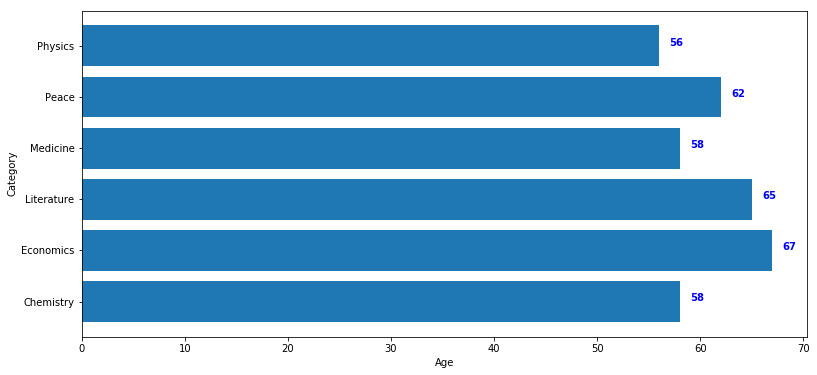

In [ ]:
field_age = nobel_data_ind[['Category','Age']].copy()
field_age = field_age.groupby('Category').mean().reset_index()
field_age['Age'] = round(field_age['Age'])

field_age_np = field_age.to_numpy()

plt.figure(figsize=(13,6))
plt.barh(field_age_np[:,0], field_age_np[:,1])
plt.ylabel('Category')
plt.xlabel('Age')

for i, v in enumerate(field_age_np[:,1].astype(int)):
    plt.text(v + 1, i + .005, str(v), color='b', fontweight='bold')
    
plt.show()


Как оказалось, каждое из направлений требует многолетних трудов

### Но, может, всё-таки учёные молодеют, и сейчас есть все шансы?

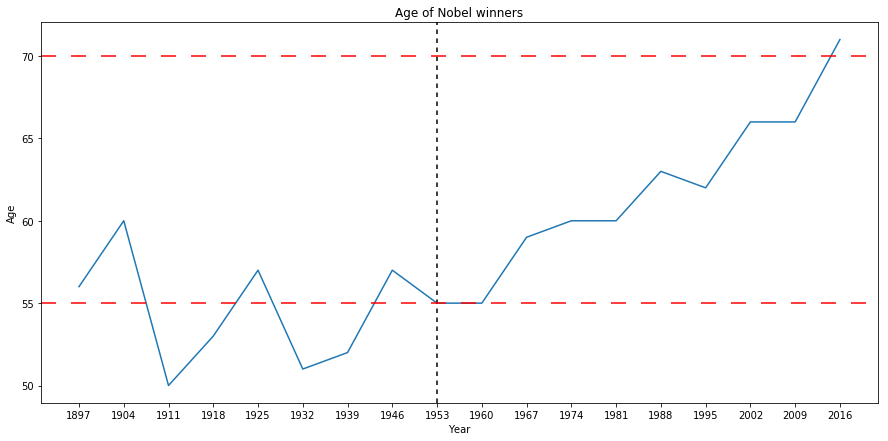

In [ ]:
year_age = nobel_data_ind[['Year','Age']].copy()
year_age['Year1'] = year_age['Year'].apply(lambda x: (x//7)*7)

year_age = year_age.groupby('Year1').mean().reset_index()
year_age['Age'] = round(year_age['Age'])


plt.figure(figsize=(15,7))
plt.plot(year_age['Year1'], year_age['Age'])
plt.xlabel('Year')
plt.xticks(year_age['Year1'])
plt.ylabel('Age')
plt.title('Age of Nobel winners')
plt.axvline(x=1953, color='black').set_dashes([3, 3, 3, 3])
plt.axhline(y=55, color='red').set_dashes([10, 10, 10, 10])
plt.axhline(y=70, color='red').set_dashes([10, 10, 10, 10])
plt.show()

Видно, что начиная с 1953 года возраст учёных, победителей Нобелевской премии, только возрастал

## Далее, хочу поизучать соотношение полов среди победителей

In [ ]:
nobel_data_ind['Sex'].isnull().sum()
#All sexes are correct

0

In [ ]:
sex_quant = nobel_data_ind[['Sex']].groupby('Sex').size().to_frame('Quant').reset_index()
sex_quant

,Sex,Quant
0,Female,48
1,Male,888


In [ ]:
female_percent = 100 * (sex_quant.to_numpy()[0, 1]/sex_quant.to_numpy()[1, 1])
female_percent = int(female_percent)
print(f'Женщин, Нобелевских призёров, всего {female_percent}%')

Женщин, Нобелевских призёров, всего 5%


### В какие года женщинам удалось стать победителями?

In [ ]:
sex_mask = nobel_data_ind['Sex'] == 'Female'
nobel_sex = nobel_data_ind[['Year', 'Category','Full Name', 'Sex',]].copy()
nobel_sex['Sex_fem'] = sex_mask

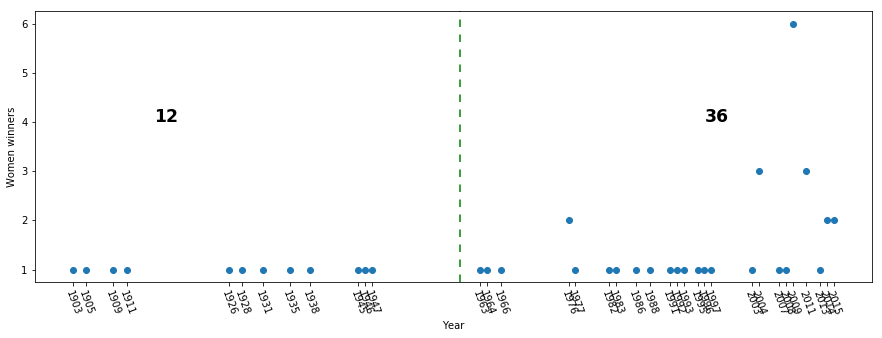

In [ ]:
nobel_sex_years = nobel_sex[['Year', 'Sex_fem']].groupby('Year').sum().reset_index().copy()
nobel_sex_years1 = nobel_sex_years[nobel_sex_years['Sex_fem']>0]

plt.figure(figsize=(15,5))
plt.scatter(nobel_sex_years1['Year'], nobel_sex_years1['Sex_fem'])
plt.ylabel('Women winners')
plt.xlabel('Year')
plt.xticks(nobel_sex_years1['Year'], rotation=-70)

b = int(nobel_sex_years1[nobel_sex_years1['Year']<1960][['Sex_fem']].sum())
a = int(nobel_sex_years1[nobel_sex_years1['Year']>=1960][['Sex_fem']].sum())

plt.text(1915, 4, str(b), color='black', fontweight='bold', fontsize='xx-large')
plt.text(1996, 4, str(a), color='black', fontweight='bold', fontsize='xx-large')

plt.axvline(x=1960, color='green').set_dashes([5, 5, 5, 5])

plt.show()

Интересен тот факт, что большинство женских побед приходится на период после 60-ых. Причин может быть множество. Именно в 60-ых началась, так называемая, "вторая волна" феминизма. А, может, стали достигать среднего возраста Нобелевского победителя люди, выросшие во времена повышенного интереса к науке. <br> И то, и то может быть верным, однако количество выдываемых Нобелевских премий выросло в принципе, и это аргумент скорее не в пользу первой причины.

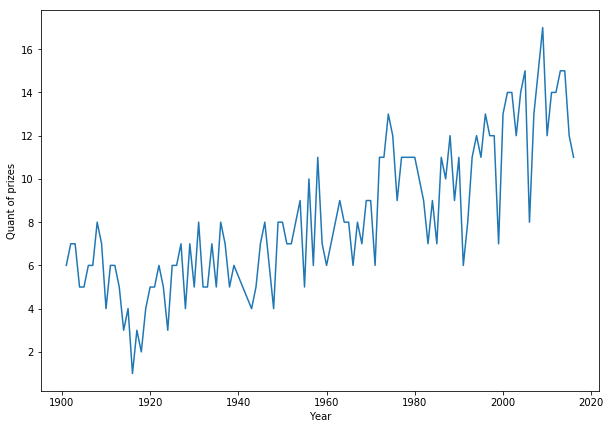

In [ ]:
nobel_prizes_quant = nobel_data_ind[['Year']].groupby('Year').size().to_frame('quant').reset_index().copy()

plt.figure(figsize=(10,7))
plt.plot(nobel_prizes_quant[['Year']], nobel_prizes_quant[['quant']])
plt.xlabel('Year')
plt.ylabel('Quant of prizes')
plt.show()

<b>!Интересно!</b> Смотря на график выше, можно заметить, что на период Первой Мировой Войны (1914-1918 гг.) приходится существенный спад по кол-ву выданных премий. <br> Все года, когда было выдано не больше 3 премий, - это года I Мировой Войны + 1924г.

In [ ]:
nobel_prizes_quant[nobel_prizes_quant['quant']<=3]

,Year,quant
13,1914,3
15,1916,1
16,1917,3
17,1918,2
23,1924,3


### Вернёмся к женщинам, как женщины распределены по дисциплинам?

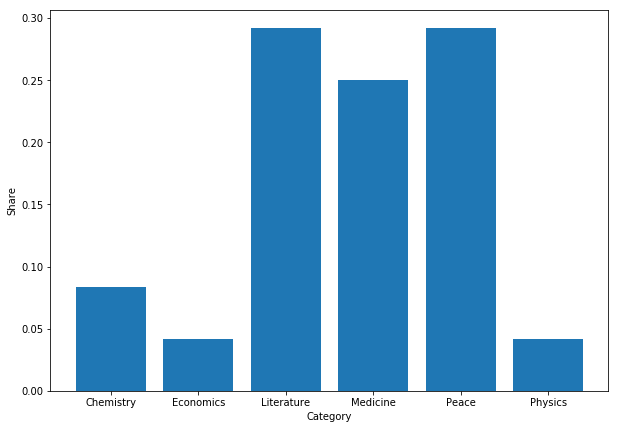

In [ ]:
nobel_sex_cat = nobel_sex[['Category', 'Sex_fem']].groupby('Category').sum().reset_index().copy()
nobel_sex_cat = nobel_sex_cat[nobel_sex_cat['Sex_fem']>0]

plt.figure(figsize=(10,7))
plt.bar(nobel_sex_cat['Category'], nobel_sex_cat['Sex_fem']/nobel_sex_cat['Sex_fem'].sum())
plt.xlabel('Category')
plt.ylabel('Share')
plt.show()

Вывод: выдающиеся результаты женщин, удостоенные Нобелевской премии, достигаются в основном в Литературе, Медицине и ещё примия Мира.
Менее успешны женщины в Физике, Экономике и Химии.

## Насколько распространены иммигранты среди Нобелевских призёров, и из каких стран иммигрируют чаще всего?

Буду смотреть по принципцу: отличается страна рождения и страна, работая на организацию которой, получил Нобелевскую премию = иммигрант

In [ ]:
nobel_data_ind_country = nobel_data_ind[(nobel_data_ind['Birth Country'].isnull() == False)&(nobel_data_ind['Organization Country'].isnull() == False)].copy()

org_countr = nobel_data_ind_country['Organization Country'].drop_duplicates().copy()

immigrant_mask = ~nobel_data_ind_country['Birth Country'].str.contains("|".join(org_countr))
nonimmigrant_mask = nobel_data_ind_country['Birth Country'].str.contains("|".join(org_countr))
nobel_immigr = nobel_data_ind_country.copy()
nobel_immigr['Immigration'] = immigrant_mask
nobel_immigr['No Immigration'] = nonimmigrant_mask

C:\Users\Alfa\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """
C:\Users\Alfa\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


In [ ]:
nobel_imm_clean = nobel_immigr[immigrant_mask][['Full Name', 'Birth Country', 'Organization Country']].copy()
nobel_imm_clean.drop_duplicates(inplace=True)

nobel_imm_clean = nobel_imm_clean[['Birth Country']].groupby('Birth Country').size().to_frame('Number of Immigrations').reset_index()
nobel_imm_clean.sort_values('Number of Immigrations', inplace=True, ascending=False)
nobel_imm_clean

,Birth Country,Number of Immigrations
18,Scotland,7
16,Prussia (Poland),5
19,South Africa,4
13,Poland,3
12,New Zealand,3
3,Egypt,2
17,Romania,2
9,Luxembourg,2
0,Brazil,1
21,Turkey,1


In [ ]:
nobel_data_ind[nobel_data_ind['Birth Country']=='Scotland'][['Full Name','Birth Country', 'Organization Country']]

,Full Name,Birth Country,Organization Country
20,Sir William Ramsay,Scotland,United Kingdom
117,John James Rickard Macleod,Scotland,Canada
140,Charles Thomson Rees Wilson,Scotland,United Kingdom
181,Arthur Henderson,Scotland,NaN
226,Sir Alexander Fleming,Scotland,United Kingdom
256,Lord (John) Boyd Orr of Brechin,Scotland,NaN
314,Lord (Alexander R.) Todd,Scotland,United Kingdom
607,Sir James W. Black,Scotland,United Kingdom
688,James A. Mirrlees,Scotland,United Kingdom


In [ ]:
nobel_immigr[nobel_immigr['Birth Country']=='Prussia (Poland)'][['Full Name','Birth Country', 'Organization Country']]

,Full Name,Birth Country,Organization Country
2,Emil Adolf von Behring,Prussia (Poland),Germany
42,Albert Abraham Michelson,Prussia (Poland),United States of America
46,Paul Ehrlich,Prussia (Poland),Germany
47,Paul Ehrlich,Prussia (Poland),Germany
92,Fritz Haber,Prussia (Poland),Germany
260,Kurt Alder,Prussia (Poland),Federal Republic of Germany


Как оказалось, иммиграция не очень распространенное явление. Подовляющее большинство иммигрантов - это иммиграция в следствие перераздела страны.

## Страна - лидер по кол-ву Нобелевских призеров

In [ ]:
nobel_country_leader = nobel_data_ind[nobel_data_ind['Organization Country'].isnull()==False].copy()

nobel_country_leader = nobel_country_leader.groupby(['Organization Country']).size().to_frame('Quantity of winners').reset_index()
nobel_country_leader.sort_values('Quantity of winners', 
                                 ascending=False)

,Organization Country,Quantity of winners
28,United States of America,361
27,United Kingdom,90
12,Germany,51
11,France,40
9,Federal Republic of Germany,26
25,Switzerland,22
18,Japan,18
24,Sweden,17
19,Netherlands,11
26,Union of Soviet Socialist Republics,11
